In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib.ticker import AutoMinorLocator

In [17]:
### Importing data into Python environment.

In [18]:
df1=pd.read_csv(r"F:\data sciene course\simplilearn\Data Science and Python\data Science with python assessment\problem 3\Comcast_telecom_complaints_data.CSV")

In [19]:
##Importing to Time-Date formate through timestamp in python

In [92]:
Date_Time=[['Date','Time']]
Comcast_telecom_complaints_data=r"F:\data sciene course\simplilearn\Data Science and Python\data Science with python assessment\problem 3\Comcast_telecom_complaints_data.CSV"
ComeCasteMasterData=pd.read_csv(Comcast_telecom_complaints_data, parse_dates = Date_Time, infer_datetime_format = False, low_memory=False,keep_date_col = True, dayfirst=True)
ComeCasteMasterData.drop(['Date', 'Date_month_year','Time'], axis=1, inplace=True)
ComeCasteMasterData.head(5)

,Date_Time,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No
2,2015-04-18 09:55:47,242732,Speed and Service,Internet,Acworth,Georgia,30101,Closed,Yes
3,2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,30101,Open,Yes
4,2015-05-26 13:25:26,307175,Comcast not working and no service to boot,Internet,Acworth,Georgia,30101,Solved,No


In [21]:
#Providing the trend chart for the number of complaints at monthly and daily granularity levels.

In [22]:
#Extracting date and Month
ComeCasteMasterData['date_value'] = ComeCasteMasterData['Date_Time'].dt.date
ComeCasteMasterData["month_of_the_year"]=ComeCasteMasterData['Date_Time'].dt.strftime('%b-%y')
ComeCasteMasterData.head()

,Date_Time,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_value,month_of_the_year
0,2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,Apr-15
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,Aug-15
2,2015-04-18 09:55:47,242732,Speed and Service,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,Apr-15
3,2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,Jul-15
4,2015-05-26 13:25:26,307175,Comcast not working and no service to boot,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,May-15


In [23]:
#Calculating Nos of complians per day
df_perday=ComeCasteMasterData.groupby('date_value').size().reset_index().rename(columns={0: 'Complains_Perday'})
df_perday

,date_value,Complains_Perday
0,2015-01-04,18
1,2015-01-05,12
2,2015-01-06,25
3,2015-02-04,27
4,2015-02-05,7
...,...,...
86,2015-11-05,12
87,2015-11-06,21
88,2015-12-04,15
89,2015-12-05,7


In [28]:
df_perday.max()

date_value          2015-12-06
Complains_Perday           218
dtype: object

In [88]:
#Extracting the month from the timestamp
df=ComeCasteMasterData
df_perMonth=ComeCasteMasterData.groupby('month_of_the_year').size().reset_index().rename(columns={0: 'Complains_Per_Month'})
#df_perMonth=df_perMonth1.sort_values("Complains_Per_Month", ascending=False)
df_perMonth

,month_of_the_year,Complains_Per_Month
0,Apr-15,375
1,Aug-15,67
2,Dec-15,65
3,Feb-15,59
4,Jan-15,55
5,Jul-15,49
6,Jun-15,1046
7,Mar-15,45
8,May-15,317
9,Nov-15,38


# Showing trend chart per day basis

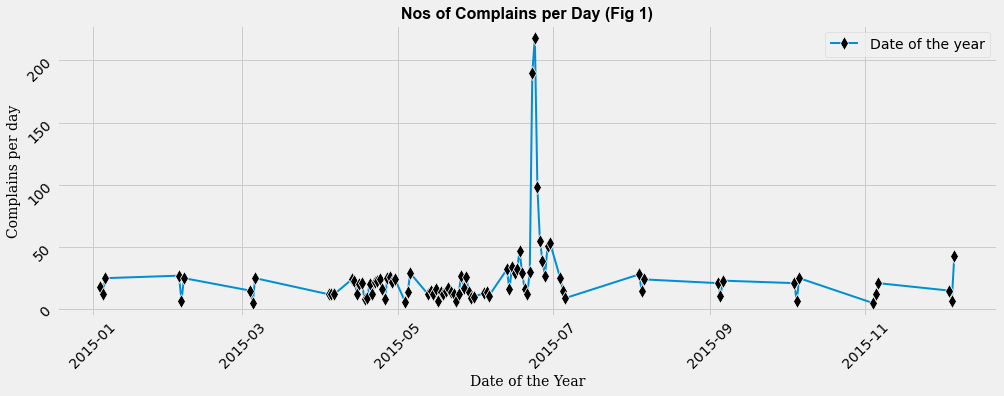

In [85]:
plt.figure(figsize = (15,5))
sns.lineplot(data=df_perday, x='date_value', y='Complains_Perday',marker = 'd', markersize = 10, markerfacecolor = 'Black',  lw = 2, label = 'Date of the year')
plt.xlabel('Date of the Year', fontsize = 14, fontfamily = 'Serif')
plt.ylabel('Complains per day', fontsize = 14, fontfamily = 'Serif')
plt.title('Nos of Complains per Day (Fig 1)', fontsize = 16, fontfamily = 'Arial', fontweight = 'semibold')
#plt.annotate('Max',xy=(2015-06, 150),  xytext = (5,75), fontsize = 18, fontfamily = 'Verdana', arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right', verticalalignment='top')
plt.tick_params(labelrotation=45)
plt.legend()
plt.show()

In [68]:
print(f"The complain is highest in the day \n{df_perday.max()}")

The complain is highest in the day 
date_value          2015-12-06
Complains_Perday           218
dtype: object


# Showing trend chart per Month basis

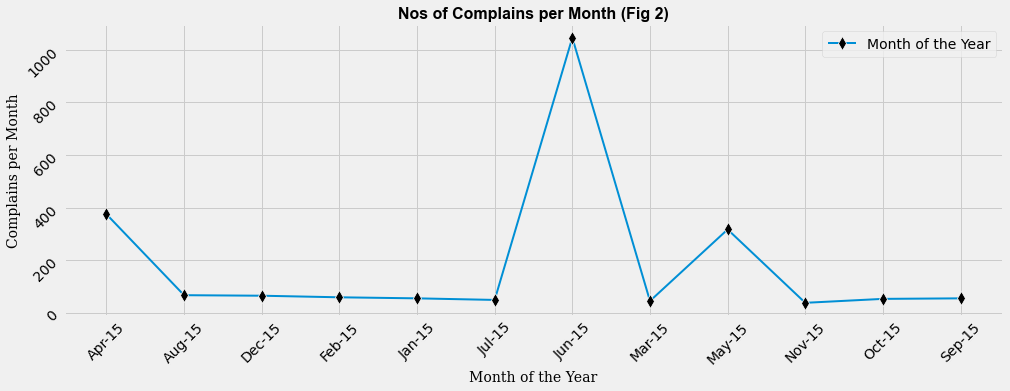

In [89]:
plt.figure(figsize = (15,5))
sns.lineplot(data=df_perMonth, x="month_of_the_year", y='Complains_Per_Month',marker = 'd', markersize = 10, markerfacecolor = 'Black',  lw = 2, label = 'Month of the Year')
plt.xlabel('Month of the Year', fontsize = 14, fontfamily = 'Serif')
plt.ylabel('Complains per Month', fontsize = 14, fontfamily = 'Serif')
plt.title('Nos of Complains per Month (Fig 2)', fontsize = 16, fontfamily = 'Arial', fontweight = 'semibold')
#plt.annotate('Max',xy=(2015-06, 150),  xytext = (5,75), fontsize = 18, fontfamily = 'Verdana', arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right', verticalalignment='top')
plt.tick_params(labelrotation=45)
plt.legend()
plt.show()

In [83]:
print(f"The complain is highest in the \n{df_perMonth.max()}")

The complain is highest in the 
  month_of_the_year  Complains_Per_Month
6            Jun-15                 1046


From Fig1 and Fig 2 it can be observed that the complain was highest in the day 2015-12-06 and month wise it was highest in the Month Jun-15

# #Table with the frequency of complaint types.

In [93]:
df2=ComeCasteMasterData
df2['Filtered Complaint'] = df2['Customer Complaint'].apply(lambda x : x.upper().replace("COMCAST",""))
df2.head(3)

,Date_Time,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Filtered Complaint
0,2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,CABLE INTERNET SPEEDS
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED
2,2015-04-18 09:55:47,242732,Speed and Service,Internet,Acworth,Georgia,30101,Closed,Yes,SPEED AND SERVICE


In [95]:
df3=df2
#Defining the class of complain types
strings = ['SPEEDS',"SPEED", 'PAYMENT', 'SERVICE',"BILL","INTERNET", "XFINITY", "DATA","DECEPTIVE","CAP", "CABLE", "PRICE", "HBO", "CHARGE", "MAIL", "USE","OUTAGE","REFUSE", "FRAUD"]
#Fitering based on this class
for x in strings:
    df3.loc[df3['Filtered Complaint'].str.contains(x,na=True),'Complain_type']=x
df3.loc[df3['Filtered Complaint'].str.contains("CHARGE",na=True),'Complain_type']="PRICE"
df3.loc[df3['Filtered Complaint'].str.contains("PAYMENT",na=True),'Complain_type']="BILL"
df3.loc[df3['Filtered Complaint'].str.contains("COMPLAIN",na=True),'Complain_type']="OTHERS"
df3.loc[df3['Filtered Complaint'].str.contains("CAP",na=True),'Complain_type']="DATA"
df3.loc[df3['Filtered Complaint'].str.contains("DECEPTIVE",na=True),'Complain_type']="FRAUD"
df3.loc[df3['Filtered Complaint'].str.contains("SPEED",na=True),'Complain_type']="INTERNET"
df3.loc[df3['Filtered Complaint'].str.contains("REFUSE",na=True),'Complain_type']="SERVICE"
df3['Complain_type'] = df3['Complain_type'].fillna("OTHERS")
df3.head()

,Date_Time,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Filtered Complaint,Complain_type
0,2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,CABLE INTERNET SPEEDS,INTERNET
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,BILL
2,2015-04-18 09:55:47,242732,Speed and Service,Internet,Acworth,Georgia,30101,Closed,Yes,SPEED AND SERVICE,INTERNET
3,2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,30101,Open,Yes,IMPOSED A NEW USAGE CAP OF 300GB THAT PUNISHE...,DATA
4,2015-05-26 13:25:26,307175,Comcast not working and no service to boot,Internet,Acworth,Georgia,30101,Solved,No,NOT WORKING AND NO SERVICE TO BOOT,SERVICE


In [96]:
#Calculating Complain Frequency and Complain type percentage for each complain class
df_ComplainType=df3.groupby('Complain_type').size().reset_index().rename(columns={0: 'Complain_Type_Frequency'})
df_ComplainType["COMPLAIN_TYPE_PERCENT"]=df_ComplainType["Complain_Type_Frequency"]/2224*100
df_ComplainType["COMPLAIN_TYPE_PERCENT"] = np.round(df_ComplainType["COMPLAIN_TYPE_PERCENT"], decimals = 2)
df_ComplainType

,Complain_type,Complain_Type_Frequency,COMPLAIN_TYPE_PERCENT
0,BILL,270,12.14
1,CABLE,45,2.02
2,DATA,226,10.16
3,FRAUD,53,2.38
4,HBO,30,1.35
5,INTERNET,506,22.75
6,MAIL,20,0.90
7,OTHERS,574,25.81
8,OUTAGE,22,0.99
9,PRICE,172,7.73


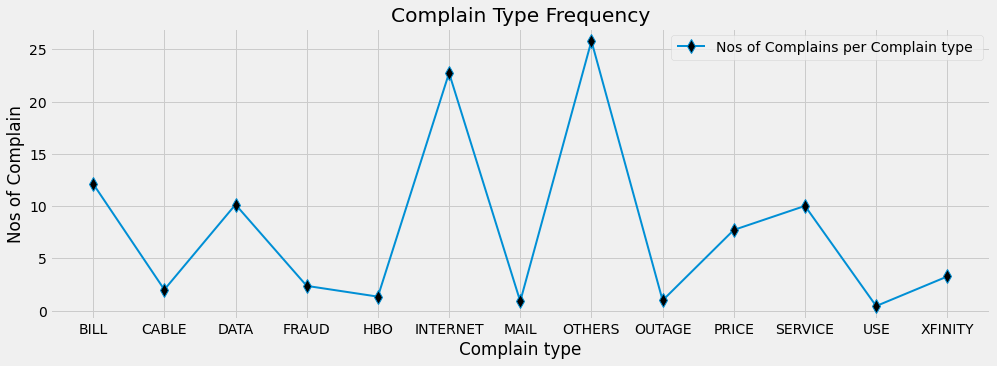

In [100]:
fig, ax = plt.subplots(figsize=(15,5))
x = df_ComplainType['Complain_type']
y = df_ComplainType['COMPLAIN_TYPE_PERCENT']
ax.plot(x, y,marker = 'd', markersize = 10, markerfacecolor = 'Black',  lw = 2, label = 'Nos of Complains per Complain type ')
ax.set_xlabel('Complain type')
ax.set_ylabel('Nos of Complain')
ax.set_title('Complain Type Frequency')
plt.legend()
plt.show()

From the graph it can be observed that the complains are mostly in Internet domain. Though in the graph and data the No of complains are most in OTHERS category, it is not to be considered as it is unclassified data which does not belong to any particular domain and even if it is classified, no one class under OTHERS category will be able to cross the Nos of complain in internet domain.

### Creating a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [101]:
df_Open_Close=ComeCasteMasterData
df_Open_Close.loc[df_Open_Close['Status'].str.contains('Closed|Solved',na=True),'Complain Closed/Open']="Closed"
df_Open_Close.loc[df_Open_Close['Status'].str.contains('Open|Pending',na=True),'Complain Closed/Open']="Open"
df_Open_Close.head()

,Date_Time,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Filtered Complaint,Complain_type,Complain Closed/Open
0,2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,CABLE INTERNET SPEEDS,INTERNET,Closed
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,BILL,Closed
2,2015-04-18 09:55:47,242732,Speed and Service,Internet,Acworth,Georgia,30101,Closed,Yes,SPEED AND SERVICE,INTERNET,Closed
3,2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,30101,Open,Yes,IMPOSED A NEW USAGE CAP OF 300GB THAT PUNISHE...,DATA,Open
4,2015-05-26 13:25:26,307175,Comcast not working and no service to boot,Internet,Acworth,Georgia,30101,Solved,No,NOT WORKING AND NO SERVICE TO BOOT,SERVICE,Closed


In [102]:
#df_statwise_complain_grouped=df_Open_Close[["State",'Complain Closed/Open']].groupby(by=["State",'Complain Closed/Open']).size()
df_statwise_complain_grouped=df_Open_Close[["State",'Complain Closed/Open']].groupby(by=["State",'Complain Closed/Open']).size().reset_index().rename(columns={0: 'Complain_Type_Frequency'})
#df_statwise_complain_grouped
df_statwise_complain_grouped

,State,Complain Closed/Open,Complain_Type_Frequency
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


In [103]:
#Calculating the state with highest no of complains (Method2)
df_state_sorted=df_Open_Close.sort_values(by=["State"],ascending=False)
dfWithHigestComplain=df_state_sorted["State"].value_counts().head(1)
print(f"State with Highest No of clomplain is\n{dfWithHigestComplain}")

State with Highest No of clomplain is
Georgia    288
Name: State, dtype: int64
